In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('file_extended.csv') # Считываем файл
n = 0 # Кол-во итераций
factors = ['passenger_count', 'trip_duration', 'distance'] # Факторы поиска аномалий

In [3]:
def algoritm(file, n_neighbors=200):
    global n, factors
    n += 1
    
    clf = LocalOutlierFactor(n_neighbors=n_neighbors)
    file[f'is_anomaly_step_{str(n)}'] = clf.fit_predict(file[factors])
    return file
    

In [4]:
def gluing(anom):
    global n
    res = anom[0]
    
    for i in range(1, n):
        res = pd.merge(res, anom[i], how="left", on=res.columns.values.tolist())
        
    return res

In [5]:
def process(file, iterations=3, neighbors_nums=[300, 500, 20]):
    global n
    anomalies = []
    for i in range(iterations):
        n_file = algoritm(file, n_neighbors=neighbors_nums[i])
        anomalies.append(n_file)
        file = n_file[n_file[f'is_anomaly_step_{str(n)}'] == -1]
    return anomalies

In [6]:
anom = process(file)

C:\Users\fadee\AppData\Local\Temp\ipykernel_2396\1738683025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[f'is_anomaly_step_{str(n)}'] = clf.fit_predict(file[factors])
C:\Users\fadee\AppData\Local\Temp\ipykernel_2396\1738683025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[f'is_anomaly_step_{str(n)}'] = clf.fit_predict(file[factors])


729322
36301


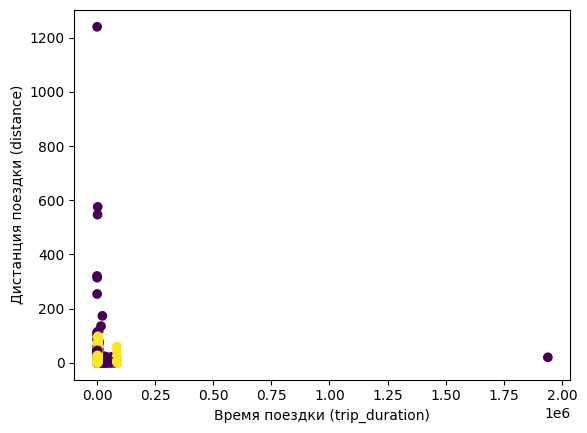

36301
869


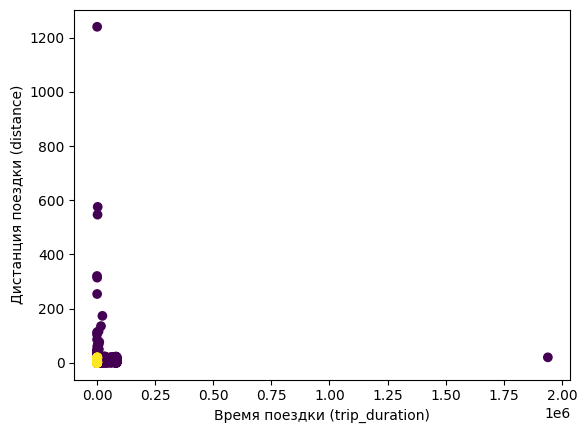

869
46


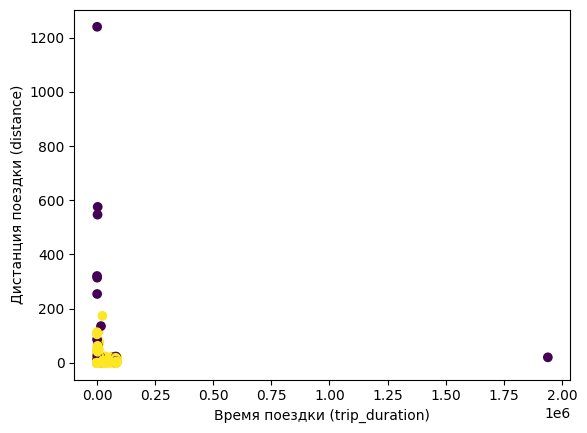

In [7]:
print(len(anom[0]))
print(len(anom[0][anom[0]['is_anomaly_step_1'] == -1]))
plt.scatter(anom[0]['trip_duration'], anom[0]['distance'], c=anom[0]['is_anomaly_step_1'])
plt.xlabel('Время поездки (trip_duration)')
plt.ylabel('Дистанция поездки (distance)')
plt.show()
#plt.savefig('1_st_lvl_anomaly')


print(len(anom[1]))
print(len(anom[1][anom[1]['is_anomaly_step_2'] == -1]))
plt.scatter(anom[1]['trip_duration'], anom[1]['distance'], c=anom[1]['is_anomaly_step_2'])
plt.xlabel('Время поездки (trip_duration)')
plt.ylabel('Дистанция поездки (distance)')
plt.show()
#plt.savefig('2_nd_lvl_anomaly')


print(len(anom[2]))
print(len(anom[2][anom[2]['is_anomaly_step_3'] == -1]))
plt.scatter(anom[2]['trip_duration'], anom[2]['distance'], c=anom[2]['is_anomaly_step_3'])
plt.xlabel('Время поездки (trip_duration)')
plt.ylabel('Дистанция поездки (distance)')
plt.show()
#plt.savefig('3_rd_lvl_anomaly')

In [8]:
res = gluing(anom)

In [9]:
res

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,is_anomaly_step_1,is_anomaly_step_2,is_anomaly_step_3
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199770,1,NaN,NaN
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.123945,1,NaN,NaN
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250436,1,NaN,NaN
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.358287,1,NaN,NaN
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328155,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,1.123068,-1,1.0,NaN
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,0.728563,1,NaN,NaN
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,2.295919,1,NaN,NaN
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,0.846722,1,NaN,NaN
